In [2]:
import pandas as pd
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [42]:
# Save relevant csv files to variables.
honda_csv = "Honda.csv"
ford_csv = "ford.csv"
toyota_csv = "Toyota.csv"
gm_csv = "GM.csv"
wti_csv = "WTI_Crude_Oil.csv"
wti_df = pd.read_csv(wti_csv)
honda_df = pd.read_csv(honda_csv)
ford_df = pd.read_csv(ford_csv)
toyota_df = pd.read_csv(toyota_csv)
gm_df = pd.read_csv(gm_csv)
wti_df.head()

,WTI Crude Oil,Dates,Last Price
0,0,2018-10-31,64.86
1,1,2018-10-30,66.35
2,2,2018-10-29,66.69
3,3,2018-10-26,67.62
4,4,2018-10-25,66.97


In [57]:
# Change the datatype to datetime to fix formatting issues.
gm_df["Dates"]= pd.to_datetime(gm_df["Dates"]) 
ford_df["Dates"]= pd.to_datetime(gm_df["Dates"]) 
honda_df["Dates"]= pd.to_datetime(gm_df["Dates"]) 
toyota_df["Dates"]= pd.to_datetime(gm_df["Dates"]) 
wti_df["Dates"]= pd.to_datetime(gm_df["Dates"]) 

WTI Crude Oil             int64
Dates            datetime64[ns]
Last Price              float64
dtype: object

In [111]:
# Create and merge dataframes.
items_pd_wti = pd.DataFrame(wti_df, columns=[
                        "Dates", "Last Price"])
items_pd_gm = pd.DataFrame(gm_df, columns=[
                        "Dates", "Last Price"])
items_pd_toyota = pd.DataFrame(toyota_df, columns=[
                        "Dates", "Last Price"])
items_pd_ford = pd.DataFrame(ford_df, columns=[
                        "Dates", "Last Price"])
items_pd_honda = pd.DataFrame(honda_df, columns=[
                        "Dates", "Last Price"])

items_merge = pd.merge(items_pd_wti,items_pd_gm, on="Dates")
items_merge.head()
items_rename = items_merge.rename(columns={"Dates": "Dates", "Last Price_x": "Crude Oil Price", "Last Price_y": "GM Stock Price"})

items_merge2 = pd.merge(items_rename,items_pd_toyota, on="Dates")
items_merge2.head()
items_rename2 = items_merge2.rename(columns={"Last Price":"Toyota Stock Price"})
items_rename2.head()

items_merge3 = pd.merge(items_rename2,items_pd_ford, on="Dates")
items_rename3 = items_merge3.rename(columns={"Last Price":"Ford Stock Price"})


items_merge4 = pd.merge(items_rename3,items_pd_honda, on="Dates")
items_merge4.head()
items_pd = items_merge4.rename(columns={"Last Price":"Honda Stock Price"})
items_pd.head()

,Dates,Crude Oil Price,GM Stock Price,Toyota Stock Price,Ford Stock Price,Honda Stock Price
0,2013-11-01,64.86,30.7922,112.7553,12.9909,35.3800
1,2013-11-04,66.35,30.8581,112.6423,13.0755,35.3535
2,2013-11-05,66.69,30.5452,111.7386,13.1447,35.1771
3,2013-11-06,67.62,30.1334,112.2687,13.0063,35.2036
4,2013-11-07,66.97,29.5816,109.4185,12.7294,34.5065


In [99]:
# Create time limits to control scope of the data.
start_date = '2017-11-01'
end_date = '2018-10-31'
mask = (items_pd['Dates'] > start_date) & (items_pd['Dates'] <= end_date)

<IPython.core.display.Javascript object>


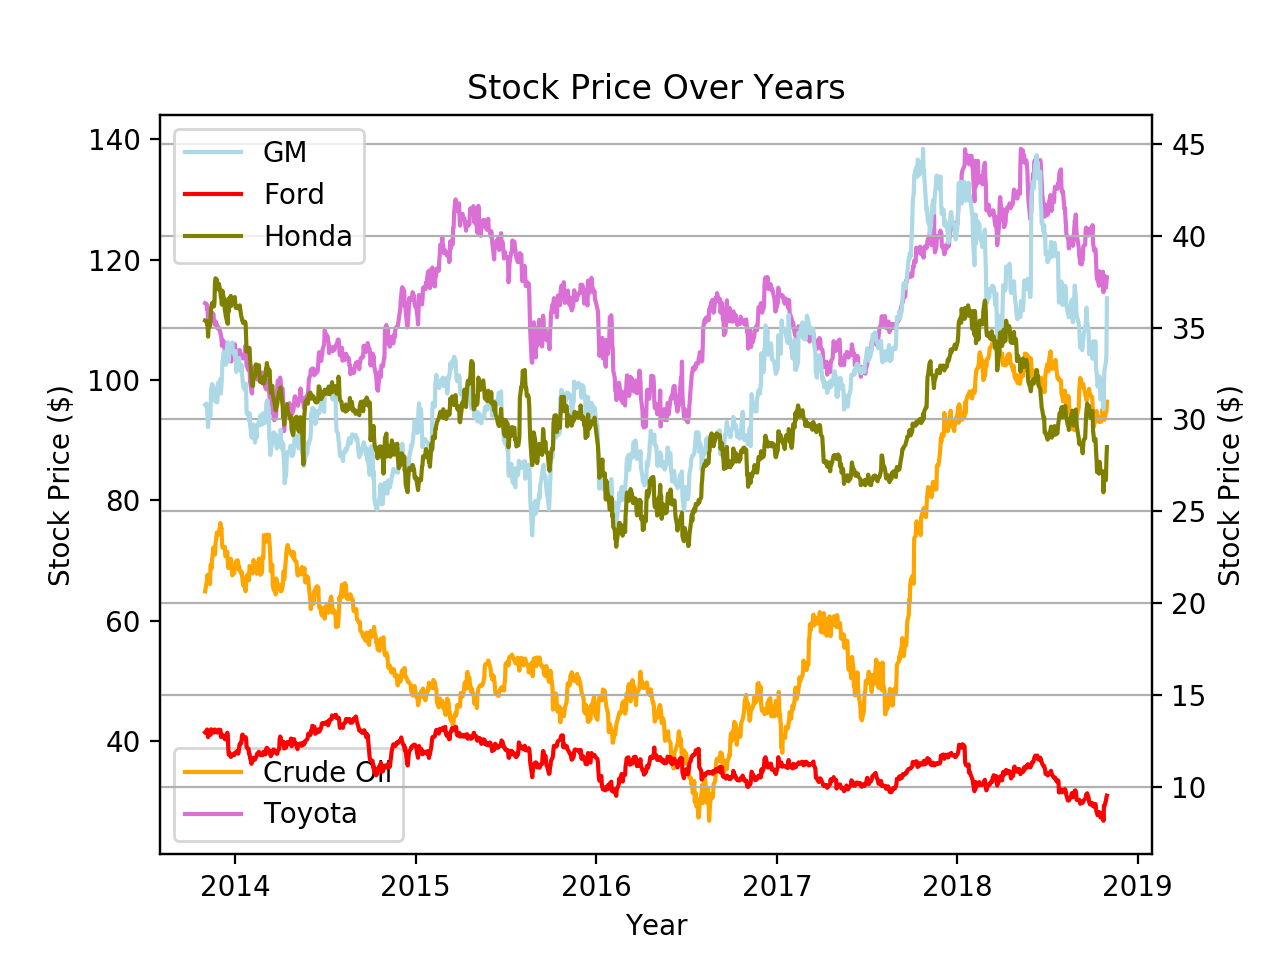

In [135]:
# Create plot and save as a png.
fig, ax = plt.subplots()
ax2= ax.twinx()
ax.plot(items_pd['Dates'], items_pd['Crude Oil Price'], label="Crude Oil", color="orange")
ax2.plot(items_pd['Dates'], items_pd['GM Stock Price'], color="lightblue", label="GM")
ax.plot(items_pd['Dates'], items_pd['Toyota Stock Price'], color="orchid", label="Toyota") 
ax2.plot(items_pd['Dates'], items_pd['Ford Stock Price'], color="red", label="Ford")
ax2.plot(items_pd['Dates'], items_pd['Honda Stock Price'], color="olive", label="Honda")

plt.grid()
plt.xlim()
ax.set_ylabel("Stock Price ($)")
plt.ylabel("Stock Price ($)")
ax.set_xlabel("Year")
ax.legend(loc="lower left")
plt.title("Stock Price Over Years")
plt.legend()
plt.show
plt.savefig("Stock_Price_over_years")